# Intro to machine learning

## Prerequisites
- [Basic Python](https://github.com/AI-Core/Python)

## What is machine learning, and why do we care about it?

Through experience, humans learn to act intelligently - to acquire and apply knowledge. We are all able to learn to accomplish tasks for ourselves, without explicitly being told how. However, there are still lots of important tasks that we don't know how to accomplish - maybe because we haven't had enough time to work on them, or maybe because. Machine learning is the field which focuses on how to have machines learn to accomplish goals for themselves.

In general, the problem of accomplishing goals can be framed as trying to produce some intended output given an input. As such, machine learning is all about automatically learning to represent the relationships between inputs and outputs. These inputs and outputs can take many forms as illustrated below.

![](images/inp-out.jpg)

We'd like to be able to build algorithms that can learn to use inputs to predict useful outputs, and solve problems such as those shown above.

**Building machines which can model the relationships between inputs and outputs is the goal of machine learning.**

## How can we approach automatically learning to model the relationships between inputs and outputs?

Almost all machine learning algorithms consist of 4 components:
1. the data
2. the model
3. the criterion
4. the optimiser

This notebook will introduce you to all of those, with simple, practical examples.

## Side note - three types of Machine Learning

There are three main categories of problems within Machine Learning. It's worth knowing these straight away, although for this series we will only consider *supervised learning*.

### **Unsupervised learning** 
Where we only have an input and try to predict something useful as an output, without being explicitly shown examples of what the output should be. This what data is likely to in order to better understand the underlying structure of it. E.g. we have data about houses and try to split these examples into different clusters.

### **Reinforcement Learning**
Where our algorithm controls and agent that interacts with it's evironment and has to learn what actions to take to perform a task. E.g. we are trying to get an robot to walk or an algorithm to learn how to win a game of chess.

### **Supervised Learning**
Where we predict an output from a input, given examples of input-output pairs. E.g. we use different features about a house such as location, number of rooms, etc and try to predict the price.

Common synonyms
- Loss funtion = cost function = criterion = error function
- Inputs = Features
- Outputs = Labels

In this notebook, and the first series of lectures, we will be learning about supervised learning - where we have datasets with both input features and output labels. Later notebooks will cover unsupervised learning and reinforcement learning. 

## 1. The data - What problem are we solving?

As mentioned, in supervised learning we have both inputs and outputs for every example in a dataset.
What the inputs and outputs in each example represent, fully determines the problem that you are trying to solve - whether it is image classification (input=image, output=label), language translation (input=spanish phrase, output=english phrase) or something totally different.

Regardless of what the data represents, it must be expressed mathematically.

![image](images/data.jpg)
![image](images/labels.jpg)

As shown above, our supervised dataset consists of $m$ inputs. Each of these inputs has $n$ features (n-dimensional feature vectors). And each input has a corresponding label (it's a supervised dataset).

As we illustrated earlier, inputs and outputs can take many forms. The inputs do not have to be vectors and the labels do not have to be scalars as shown in the example.

- Image inputs could be matrices with width and height, rather than just vector length.
- Inputs could only have one feature, in which case they would be scalars (this is what we will implement now)

- If we were trying to classify an input as a member of a particular, discrete class (classifying dogs vs cats vs turtles for example), then we would have a vector output with the length of the number of classes - where each of those elements represents the confidence with which our model predicts the input to be a member of that corresponding class.
- Outputs could be an image or a video or a sound wave or spectrogram

Lets create a function that generates some artificial data.

The function should return an array of scalar features and an array of scalar labels which have a linear relationship (straight line, i.e. $y=wx + b$).
Both the features and labels should have length $m$ - which is an argument to the function. 
Although data collected in the real world often has much more complex correlations, linear functions make simple  test cases to learn about machine learning algorithms.

X: [ 1.14001301  1.51532858 -1.43199418  1.18220409 -0.76196803 -0.67816863
  0.23415629 -0.05932699  0.22445378 -1.32669574] 

Y: [ -5.24790585  -4.38947336 -11.20626482  -5.25428547  -9.63388933
  -9.61339124  -7.28105857  -8.21702643  -7.66340481 -10.7169025 ] 



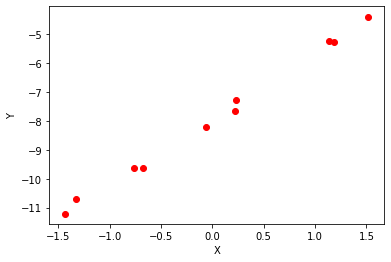

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sample_linear_data(m=20): 
    ground_truth_w = 2.3 # slope (weight)
    ground_truth_b = -8 # intercept (bias)
    X = np.random.randn(m) # m random values from a random normal distribution
    Y = ground_truth_w*X + ground_truth_b + 0.2*np.random.randn(m) # compute the output (with some random noise added)
    return X, Y # returns X (the input) and Y (labels)

def plot_data(X, Y):
    plt.figure() # create a figure
    plt.scatter(X, Y, c='r') # plot the data in color=red
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
m = 10
X, Y = sample_linear_data(m)
print('X:',X, '\n')
print('Y:',Y, '\n')
plot_data(X, Y)

## 2. The model - How can we make predictions?
We want to be able use information that we have, to predict useful information that we don't have. 
This is an input-output problem - we have an input (info we know), we want an output (info we don't have).
Mathematical functions can represent input output relationships e.g. $y = 2x +3$.
So we will use mathematical functions to model the relationship between our inputs and outputs.
Our goal is to model the world, and use that to be able to intelligently infer a lot from a little.

Lets create a simple model that represents a straight line (linear) relationship between the input and output and use it to make predictions about outputs, given inputs. It should be able to take in an array of inputs form different examples and output predictions for all of them in parallel. 

Our model will be of the form $y = wx + b$.

![title](images/NN1_singlevar_lr_equation.JPG)

In [2]:
class LinearHypothesis:
    def __init__(self): #initalize parameters 
        self.w = np.random.randn() #weight
        self.b = np.random.randn() #bias
        
    def __call__(self, X): #how do we calculate output from an input in our model?
        ypred = self.w*X + self.b # make a prediction
        return ypred # return prediction
    
    def update_params(self, new_w, new_b):
        self.w = new_w # set this instance's weights to the new weight value passed to the function
        self.b = new_b # do the same for the bias

In [3]:
H = LinearHypothesis() # instantiate our linear model
y_hat = H(X) # make prediction
print('Input:',X, '\n')
print('W:', H.w, 'B:', H.b, '\n')
print('Prediction:', y_hat, '\n')

Input: [ 1.14001301  1.51532858 -1.43199418  1.18220409 -0.76196803 -0.67816863
  0.23415629 -0.05932699  0.22445378 -1.32669574] 

W: 1.4071326382950298 B: 0.6212397501583286 

Prediction: [ 2.22538926  2.75350805 -1.393766    2.28475772 -0.45095033 -0.33303347
  0.95072871  0.5377588   0.93707598 -1.24559713] 



Lets visualise our hypothesis against the true features and labels

In [4]:
def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Hypothesis', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

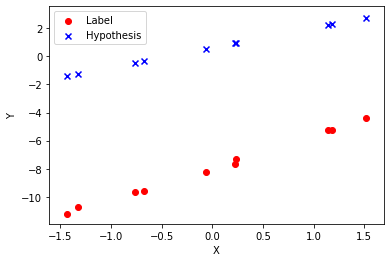

In [5]:
plot_h_vs_y(X, y_hat, Y)

## 3. The criterion - How do we know how good our model is?

#### The criterion will also be referred to as the loss function, cost function, error function or objective.

Our criterion should be a measure of how bad our model is. We will use it to compare different models. As the model gets worse the loss function should return larger values.

### Mean squared error (MSE) loss

**One way** to evaluate the performance of a model that predicts continuous (not discrete or bounded) outputs is to use the mean squared error loss. This does exactly what you think: it calculates the error (difference between our model's prediction and the true label) and then squares it and takes the mean of those square errors for each example. Squaring any value makes it positive, so as long as the error is not zero it will increase the value of the loss - regardless of whether our prediction is below (negative error) or above (positive error) the value of the label, the values of that **squared** difference will increase the returned loss.

There are many other criterions that are useful for different tasks (e.g. cross entropy loss for classification)

Let's write a function to calculate the cost using the mean squared error loss function. It should take in an array of predictions for different example inputs as well as an array of corresponding example labels. It should return a single number (scalar) that represents the MSE loss. 

![title](images/NN1_cost_function.JPG)

In [6]:
def L(y_hat, labels):
    errors = y_hat - labels # calculate errors
    squared_errors = np.square(errors) # square errors
    mean_squared_error = np.sum(squared_errors) / (m) # calculate mean 
    return mean_squared_error # return loss

In [7]:
cost = L(y_hat, Y)
print(cost)

73.85285188227346


## 4. The optimiser

The optimiser optimises our model. Most machine learning models are **parametric**, which means that the function which they represent depends on their parameters (in our case the weight (slope) and bias (intercept)). Different optimisers improve our models using different algorithms.

In this notebook we will implement some fundamental optimisation techniques: random search and grid search.

### Random Search
Random seach is the process of randomly choosing values within a specified range and testing them to evaluate how good they are. E.g. test random values between 0 and 10.

![](images/NN1_randomsearch.JPG)

Let's implement a function that tries a bunch of possible values for the weight and bias of our model.

In [8]:
def random_search(n_samples, limit=7):
    best_weights = None # no best weight found yet
    best_bias = None # no best bias found yet
    lowest_cost = 100000 # initialize it very high
    for i in range(n_samples): # try this many different parameterisations
        w, b = np.random.uniform(-limit, limit), np.random.uniform(-limit, limit)
        H.update_params(w, b) # update our model with random parameters
        y_hat = H(X) # make prediction
        cost = L(y_hat, Y) # calculate loss
        if cost < lowest_cost: # if this is the best parameterisation so far
            lowest_cost = cost # update the lowest running cost to the cost for this parameterisation
            best_weights = H.w # get best weights so far from the model
            best_bias = H.b # get best bias so far from the model
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return best_weights, best_bias

Lowest cost of 2.869415054831863 achieved with weight of 1.6657217496999532 and bias of -6.353496569545337


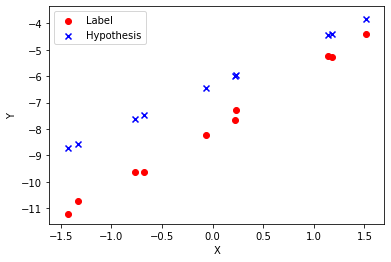

In [9]:
best_weights, best_bias = random_search(100)
H.update_params(best_weights, best_bias) # make sure to set our model's weights to the best values we found
plot_h_vs_y(X, H(X), Y)

### What happened?

Our random search optimisation was able to fit the input-output relationship of our data! Or at least it got close. 

#### Why doesn't it get closer as we sample more potential parameterisations? 
This is because of the limits of the values of the parameters that we perform the grid search over. In this case, by default we are only trying parameters in the range from -7 to 7. But the true bias is -8 which is outside of this range. So we have made a mistake in assuming the range of values that our optimal parameterisation might be included in. Feel free to change this limit in the function definition to see the model converge. 

### Grid Search

Grid search is the process of trying out values at common intervals within a specified range for each parameter, and testing them to evaluate how good they are. E.g. test the values [0, 1, 2, 3, 4, 5]

![](images/NN1_gridsearch.JPG)

In [10]:
from itertools import permutations
def generate_grid_search_values(n_params, n_samples_per_param=10, minval=-2.5, maxval=2.5):
    print(f'Trying {n_samples_per_param} samples per parameter')
    param_values = np.linspace(-20, 20, n_samples_per_param) # get list of different values to try for each parameter (use minval and maxval arguments) 
    grid_samples = permutations(param_values, n_params) # get a list of different (weight, bias) pairs to try (look up the permutations function we imported)
    return grid_samples

def grid_search(grid_search_values):
    best_weights = None # no best weight found yet
    best_bias = None # no best bias found yet
    lowest_cost = 100000 # initialize it very high
    for search_val in grid_search_values: # for each model parameterisation that we will try 
        H.update_params(search_val[0], search_val[1]) # update model parameters
        y_hat = H(X) # make prediction
        cost = L(y_hat, Y) # calculate loss
        if cost < lowest_cost: # if this is the best parameterisation so far
            lowest_cost = cost # update the lowest running cost to the cost for this parameterisation
            best_weights = H.w # get best weights so far from the model
            best_bias = H.b # get best bias so far from the model
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return best_weights, best_bias

Trying 5 samples per parameter
Lowest cost of 9.486605615144395 achieved with weight of 0.0 and bias of -10.0


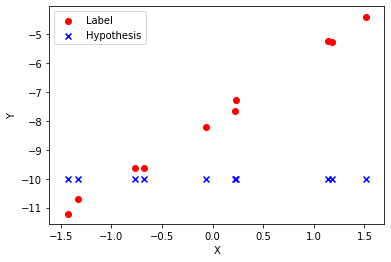

Trying 4 samples per parameter
Lowest cost of 20.856708303246908 achieved with weight of 6.666666666666668 and bias of -6.666666666666666


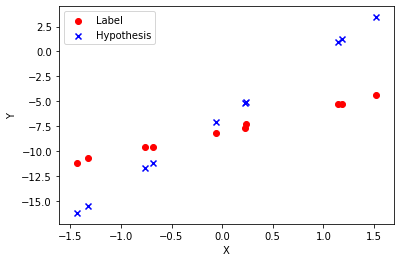

In [11]:
grid_search_values = generate_grid_search_values(2, n_samples_per_param=5) # generate model parameterisations to try
best_weights, best_bias = grid_search(grid_search_values) # perform grid search
H.update_params(best_weights, best_bias) # update model with best parameters found
plot_h_vs_y(X, H(X), Y) # plot predictions and true labels

grid_search_values = generate_grid_search_values(2, n_samples_per_param=4) # generate model parameterisations to try
best_weights, best_bias = grid_search(grid_search_values) # perform grid search
H.update_params(best_weights, best_bias) # update model with best parameters found
plot_h_vs_y(X, H(X), Y) # plot predictions and true labels

### What happened?

#### Why was 4 samples better  and 99 samples (pretty bad)? 

Well, grid search will only test parameterisations that are exactly on it's grid. In the case of the 99 samples, the optimal parameters do exist within this region, but they dont lie exactly on the grid - they lie between points that we test on the grid. Hence those optimal parameters are not found. 

With the 100 samples, one of the parameterisations (pairs of weight and bias) on our grid lies close to the actual optimal values. So the model manages to much better represent the input-output relationship between our features and labels.

Another danger would be that the space which we are searching with our grid does not contain the optimal parameterisation.

### Will random search and grid search get us all the way?

Aside from the issues showcased above, the major limitation of these search methods is how they scale with the number of parameters in our model. To model more complex functions we'll need more complex models - models with more parameters (the models we'll use next workshop will have at least thousands). But the time taken for these search methods scales **exponentially** with the number of parameters. This is because these methods have to search the whole space, and they keep searching even if they find the optimal value (they can't be sure it's the best parameterisation in the domain that they're checking until they've compared it to everywhere else.

## Yes, you made it!
In this notebook, we learnt the very basic recipe for making machine learning algorithms. This consisted of:
1. The data - our examples of inputs and outputs (in the supervised case) which determine the function that our model will learn to represent and hence the problem that we are solving
2. The model - our mathematical function that we pass our data forward through to make a prediction for the output
3. The criterion - how we measure how bad our model is. We used the mean squared error loss function.
4. The optimiser - our method for updating the parameters of our models. We tried out random search and grid search.


## Next steps

- [Gradient based optimisation]() - in this notebook we will look at optimisation techniques that do scale to more complex models and problems